# Learning and Decision Making

## Laboratory 1: Markov chains

In the end of the lab, you should submit all code/answers written in the tasks marked as "Activity n. XXX", together with the corresponding outputs and any replies to specific questions posed to the e-mail <adi.tecnico@gmail.com>. Make sure that the subject is of the form [&lt;group n.&gt;] LAB &lt;lab n.&gt;.

### 1. Modeling

Consider once again the train modeling problem described in the Homework and for which you wrote a Markov chain model:

<img src="trains.png" width="400px">

Recall that your chain should describe the motion of the single train traveling the network, where: 

* Stations $A$ and $B$ are just like regular stops;
* The travel time between any two consecutive stops is exactly 10 minutes. The train stops exactly 2 minutes in each location.
* At the intersection marked with a bold $\times$, the train follows the branch 1-3 with probability 0.5, the branch 4 with probability 0.15, and the branch 5-6 with probability 0.35.

---

#### Activity 1.        

Implement your Markov chain model in Python. In particular,

* Create a list with all the states;
* Define a `numpy` array with the corresponding transition probabilities.

The order for the states used in the transition probability matrix should match that in the list of states. 

**Note 1**: Don't forget to import `numpy`. If you need additional matrix operations (such as matrix powers or eigenvalues and eigenvectors), you may also import the library `numpy.linalg`.

**Note 2**: Make sure to print the result in the end.

---

In [1]:
import numpy

states = ["Station A", "Stop 1", "Stop 2", "Stop 3", "Stop 4", "Stop 5", "Stop 6", "Station B"]

prob = numpy.array([[0, .5, 0, 0, .15, .35, 0, 0],
                    [0, 0, 1, 0, 0, 0, 0, 0],
                    [0, 0, 0, 1, 0, 0, 0, 0],
                    [0 ,0 ,0 ,0 ,0 ,0 ,0 ,1],
                    [0 ,0 ,0 ,0 ,0 ,0 ,0 ,1],
                    [0 ,0 ,0 ,0 ,0 ,0 ,1 ,0],
                    [0 ,0 ,0 ,0 ,0 ,0 ,0 ,1],
                    [1 ,0 ,0 ,0 ,0 ,0 ,0 ,0]])

print(states)
print(prob)

['Station A', 'Stop 1', 'Stop 2', 'Stop 3', 'Stop 4', 'Stop 5', 'Stop 6', 'Station B']
[[0.   0.5  0.   0.   0.15 0.35 0.   0.  ]
 [0.   0.   1.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   1.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   1.  ]
 [0.   0.   0.   0.   0.   0.   0.   1.  ]
 [0.   0.   0.   0.   0.   0.   1.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   1.  ]
 [1.   0.   0.   0.   0.   0.   0.   0.  ]]


---

#### Activity 2.

Compute, using the proper transition matrix manipulations, the probability of the following trajectories:

* 4 - $B$ - $A$ - 4
* $A$ - 2 - 3 - $B$ - $A$
* 5 - 6 - $B$ - $A$ - 4

**Note:** Make sure to print the result in the end.

---

In [2]:
print(prob[4][7] * prob[7][0] * prob[0][4])
print(prob[0][2] * prob[2][3] * prob[3][7] * prob[7][0])
print(prob[5][6] * prob[6][7] * prob[7][0] * prob[0][4])

0.15
0.0
0.15


### 2. Stability

---

#### Activity 3

Compute the stationary distribution for the chain. Confirm, computationally, that it is indeed the stationary distribution.

**Note:** The stationary distribution is a *left* eigenvector of the transition probability matrix associated to the eigenvalue 1. As such, you may find useful the numpy function `numpy.linalg.eig`. Also, recall that the stationary distribution is *a distribution*.

---

In [3]:
# The "round(14)"'s are to account for precision errors

import numpy.linalg

def normalize(vec):
    s = 0
    for elem in vec:
        s += elem
    v = []
    for elem in vec:
        v.append(numpy.real(elem/s))
    return numpy.array(v)

w, v = numpy.linalg.eig(prob.transpose())

i = 0
for elem in w:
    if round(elem, 14) == 1:
        break
    i += 1
    
eigvec = v.transpose()[i].round(14)
norm = normalize(eigvec)
print(norm.round(3))

print("Confirmation: ", numpy.array_equal(numpy.matmul(prob.transpose(), eigvec).round(14), eigvec.round(14)))

[0.23  0.115 0.115 0.115 0.034 0.08  0.08  0.23 ]
Confirmation:  True


---

#### Activity 4.

Empirically show that the chain is ergodic.

**Note:** Recall that a chain is ergodic if, given any initial distribution, it converges to the stationary distribution.

---

In [4]:
n = 0
while True:
    
    p_n = numpy.linalg.matrix_power(prob, n)
    
    found = True
    
    vec = p_n[0]
    
    for line in p_n:
        if not numpy.array_equal(line, vec):
            n += 1
            found = False
            break
            
    if found:
        break

print(vec)
print("Equal: ", numpy.array_equal(vec.round(14), norm.round(14)))
    

[0.22988506 0.11494253 0.11494253 0.11494253 0.03448276 0.08045977
 0.08045977 0.22988506]
Equal:  True


### 3. Simulation

You are now going to *simulate* the Markov chain that you defined in Question #1.

---

#### Activity 5

Generate a 10,000-step long trajectory of the chain defined in Activity #1. 

---

In [61]:
state = 0

chain = [states[state]]

for i in range(10000-1):
    state = numpy.random.choice(8, 1, p = prob[state])[0]
    chain.append(states[state])
    
print(chain)

['Station A', 'Stop 1', 'Stop 2', 'Stop 3', 'Station B', 'Station A', 'Stop 4', 'Station B', 'Station A', 'Stop 1', 'Stop 2', 'Stop 3', 'Station B', 'Station A', 'Stop 1', 'Stop 2', 'Stop 3', 'Station B', 'Station A', 'Stop 5', 'Stop 6', 'Station B', 'Station A', 'Stop 4', 'Station B', 'Station A', 'Stop 5', 'Stop 6', 'Station B', 'Station A', 'Stop 1', 'Stop 2', 'Stop 3', 'Station B', 'Station A', 'Stop 4', 'Station B', 'Station A', 'Stop 4', 'Station B', 'Station A', 'Stop 1', 'Stop 2', 'Stop 3', 'Station B', 'Station A', 'Stop 4', 'Station B', 'Station A', 'Stop 4', 'Station B', 'Station A', 'Stop 1', 'Stop 2', 'Stop 3', 'Station B', 'Station A', 'Stop 1', 'Stop 2', 'Stop 3', 'Station B', 'Station A', 'Stop 1', 'Stop 2', 'Stop 3', 'Station B', 'Station A', 'Stop 5', 'Stop 6', 'Station B', 'Station A', 'Stop 5', 'Stop 6', 'Station B', 'Station A', 'Stop 5', 'Stop 6', 'Station B', 'Station A', 'Stop 5', 'Stop 6', 'Station B', 'Station A', 'Stop 1', 'Stop 2', 'Stop 3', 'Station B', 'St

---

#### Activity 6

Draw a histogram of the trajectory generated in Activity #5. Make sure that the histogram has one bin for each state. Compare the relative frequencies with the result of Activity #3.

**Note**: Don't forget to load `matplotlib`.

---

<IPython.core.display.Javascript object>


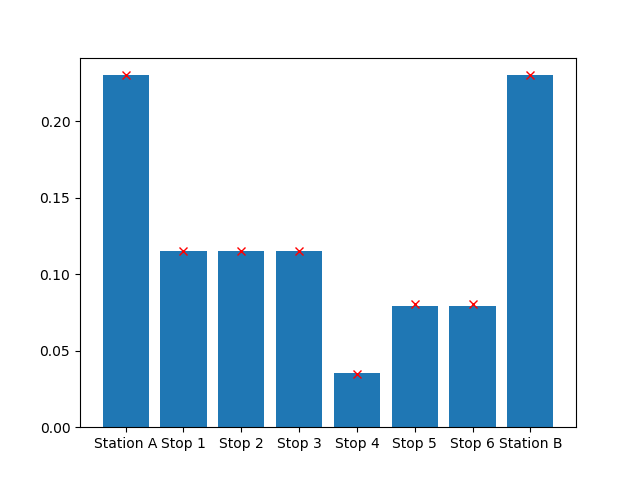

In [62]:
%matplotlib notebook
import matplotlib.pyplot as plt

absolute_freq = numpy.zeros(8)

for elem in chain:
    absolute_freq[states.index(elem)] += 1

relative_freq = absolute_freq / len(chain)

fig, ax = plt.subplots()

ax.bar(states, relative_freq)
ax.plot(norm, 'rx')
